In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 89% 47.0M/52.6M [00:00<00:00, 134MB/s]
100% 52.6M/52.6M [00:00<00:00, 120MB/s]


In [ ]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [ ]:
df_train = pd.read_csv('data/train.csv.zip')

In [ ]:
df_test = pd.read_csv('data/test.csv.zip')

In [ ]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
df_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
df_train['toxic'].value_counts(normalize = True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

In [ ]:
target_cols = df_train.columns[2:]
target_cols

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
for cols in target_cols:
  print(df_train[cols].value_counts(normalize = True))


0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [ ]:
from torchtext.data.utils import get_tokenizer

In [ ]:
tokenizer = get_tokenizer('basic_english')

In [ ]:
sample = df_train['comment_text'][0]

In [ ]:
tokenizer(sample)[:5]

['explanation', 'why', 'the', 'edits', 'made']

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
comments = df_train.comment_text.map(tokenizer)

In [ ]:
VOCAB_SIZE = 2000

In [ ]:
unk_token = '<unk>'
pad_token = '<pad>'

In [ ]:
vocab =  build_vocab_from_iterator(comments,specials = [unk_token,
pad_token],max_tokens = VOCAB_SIZE)

In [ ]:
vocab[unk_token]

0

In [ ]:
vocab['how']

82

In [ ]:
vocab.set_default_index(vocab[unk_token])

In [ ]:
vocab['hardcore']

0

In [ ]:
df_train.comment_text.sample(1000).map(tokenizer).map(len)

115772     25
33573      47
138714      4
42015     152
142280     13
         ... 
6206       21
13719      22
10563      47
129361     26
65929      43
Name: comment_text, Length: 1000, dtype: int64

<AxesSubplot:ylabel='Frequency'>

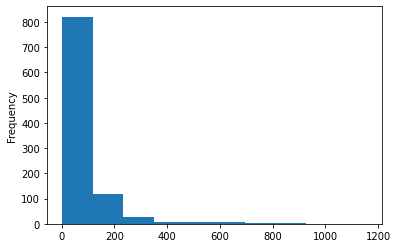

In [ ]:
df_train.comment_text.sample(1000).map(tokenizer).map(len).plot(kind = 'hist')

In [ ]:
Max_length = 150

In [ ]:
def pad_tokens(tokens):
  if(len(tokens) >= Max_length):
    return tokens[:Max_length]
  else :
    return tokens + [pad_token]*(Max_length - len(tokens))


In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class JigsawDataset(Dataset):
  def __init__(self,df,is_test = False):
    self.df = df
    self.is_test = is_test
  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index]
    comment_tokens = pad_tokens(tokenizer(comment_text))
    input = torch.tensor(vocab.lookup_indices(comment_tokens))
    if self.is_test:
      target = torch.tensor([0,0,0,0,0,0], dtype = float)
    else :
      target = torch.tensor(self.df[target_cols].values[index]).float()
    return input,target
  def __len__(self) :
    return len(self.df)

In [ ]:
df = JigsawDataset(df_train)

In [ ]:
df[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
from torch.utils.data import random_split

In [ ]:
val_frac = 0.25

In [ ]:
train_df , val_df = random_split(df_train,[1-val_frac,val_frac])

In [ ]:
len(train_df), len(val_df)

(119679, 39892)